In [3]:
from dotenv import load_dotenv
load_dotenv()

True

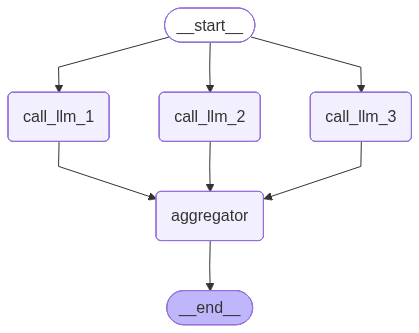

Here's a story, joke, and poem about cats!

STORY:
Once upon a time, in a small village nestled in the countryside, there lived a group of cats who were known far and wide for their mischievous antics and playful nature. These cats roamed the streets freely, causing chaos wherever they went.

One particularly mischievous cat was named Whiskers. Whiskers was a sleek black cat with bright green eyes and a mischievous glint in them. He was always getting into trouble, whether it was stealing food from the local market or knocking over flower pots in the village square.

Despite his troublesome ways, Whiskers was loved by all the villagers. They couldn't help but smile at his antics and playful demeanor. But one day, Whiskers took his mischief too far. He snuck into the local bakery and caused a huge mess, knocking over bags of flour and spilling milk everywhere.

The baker was furious and threatened to chase Whiskers out of the village for good. But before he could do so, the other cats i

In [7]:
from typing import TypedDict
from langgraph.graph.state import StateGraph
from langgraph.graph import START, END
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

from IPython.display import Image, display

# Initialize the LLM (adjust model name if needed)
llm = ChatOpenAI(model = "gpt-3.5-turbo", temperature=0)


# Graph state
class State(TypedDict):
   topic: str
   joke: str
   story: str
   poem: str
   combined_output: str

# Nodes
def call_llm_1(state: State):
   """First LLM call to generate initial joke"""

   msg = llm.invoke(f"Write a joke about {state['topic']}")
   return {"joke": msg.content}

def call_llm_2(state: State):
   """Second LLM call to generate story"""

   msg = llm.invoke(f"Write a story about {state['topic']}")
   return {"story": msg.content}

def call_llm_3(state: State):
   """Third LLM call to generate poem"""

   msg = llm.invoke(f"Write a poem about {state['topic']}")
   return {"poem": msg.content}

def aggregator(state: State):
   """Combine the joke and story into a single output"""

   combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
   combined += f"STORY:\n{state['story']}\n\n"
   combined += f"JOKE:\n{state['joke']}\n\n"
   combined += f"POEM:\n{state['poem']}"
   return {"combined_output": combined}

# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()

# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Invoke
state = parallel_workflow.invoke({"topic": "cats"})
print(state["combined_output"])
